In [1]:
import matplotlib.pyplot as plt #plotting
import pylab as pl #plotting

from sklearn import ensemble #randomforest
from sklearn.datasets import load_digits #dataset
from sklearn.model_selection import train_test_split #split dataset

%matplotlib inline

digits = load_digits()

<Figure size 432x288 with 0 Axes>

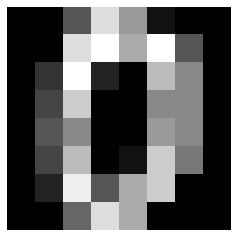

In [2]:
#Visualize an image
pl.gray() 
pl.matshow(digits.images[0])
pl.axis('off')
pl.show()

In [3]:
#Analyze image pixels
#Each element represents the pixel of our greyscale image. 
#The value ranges from 0 to 255 for an 8 bit pixel.

digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [4]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

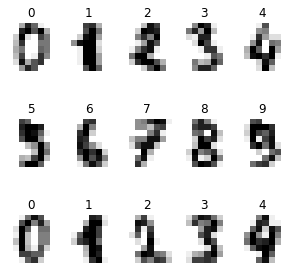

In [6]:
#Visualize first 15 images in the dataset

images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(5,5))

for index, (image, label) in enumerate(images_and_labels[:15]):
    plt.subplot(3, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

In [7]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

## Random Forest Classifier

In [8]:
#Using the Random Forest Classifier
classifier = ensemble.RandomForestClassifier(max_depth=9, random_state=0)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

#Get score with test set
# Return the mean accuracy on the given test data and labels.
# In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.
score = classifier.score(X_test, y_test)
print ('Random Tree Classifier:\n') 
print ('Score\t'+str(score))

Random Tree Classifier:

Score	0.8865406006674083


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [9]:
# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)
predicted[:15]

array([8, 3, 4, 9, 0, 8, 9, 8, 1, 2, 3, 4, 5, 6, 7])

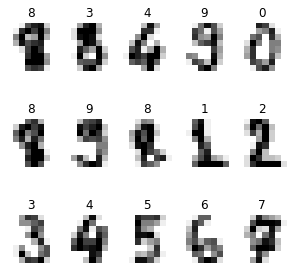

In [10]:
#Visualize first 15 predicted images

images_and_labels = list(zip(digits.images[n_samples // 2:], predicted))
plt.figure(figsize=(5,5))
for index, (image, label) in enumerate(images_and_labels[:15]):
    plt.subplot(3, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

## Support Vector Machine Classifier

In [11]:
# Create a classifier: a support vector classifier

from sklearn import datasets, svm, metrics
svc_classifier = svm.SVC(gamma=0.001)

In [12]:
svc_classifier.fit(X_train, y_train)
svc_score = svc_classifier.score(X_test, y_test)
print ('Support Vector Machine:\n') 
print ('Score\t'+str(svc_score))

Support Vector Machine:

Score	0.9688542825361512


In [13]:
svc_predicted = svc_classifier.predict(X_test)
svc_predicted[:15]

array([8, 8, 4, 9, 0, 8, 9, 8, 1, 2, 3, 4, 5, 6, 7])

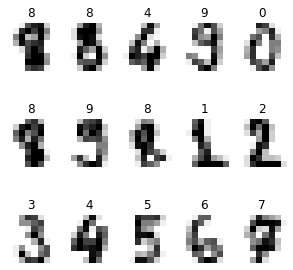

In [14]:
#Visualize first 15 predicted images

images_and_labels = list(zip(digits.images[n_samples // 2:], svc_predicted))
plt.figure(figsize=(5,5))
for index, (image, label) in enumerate(images_and_labels[:15]):
    plt.subplot(3, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)